In [1]:
import Wavefront_Generation as WG
import Wavefront_Plotting as WP
import Wavefront_Misc as WM
import Wavefront_Interactive as WI
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import interact, widgets
from enum import Enum
%matplotlib widget

In [2]:
interface = WG.Full_Cycle(L_time=3,C_time =7,L_impedance = 100,show_about=False, number_periods=1.5)

GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=214.94879206690032)

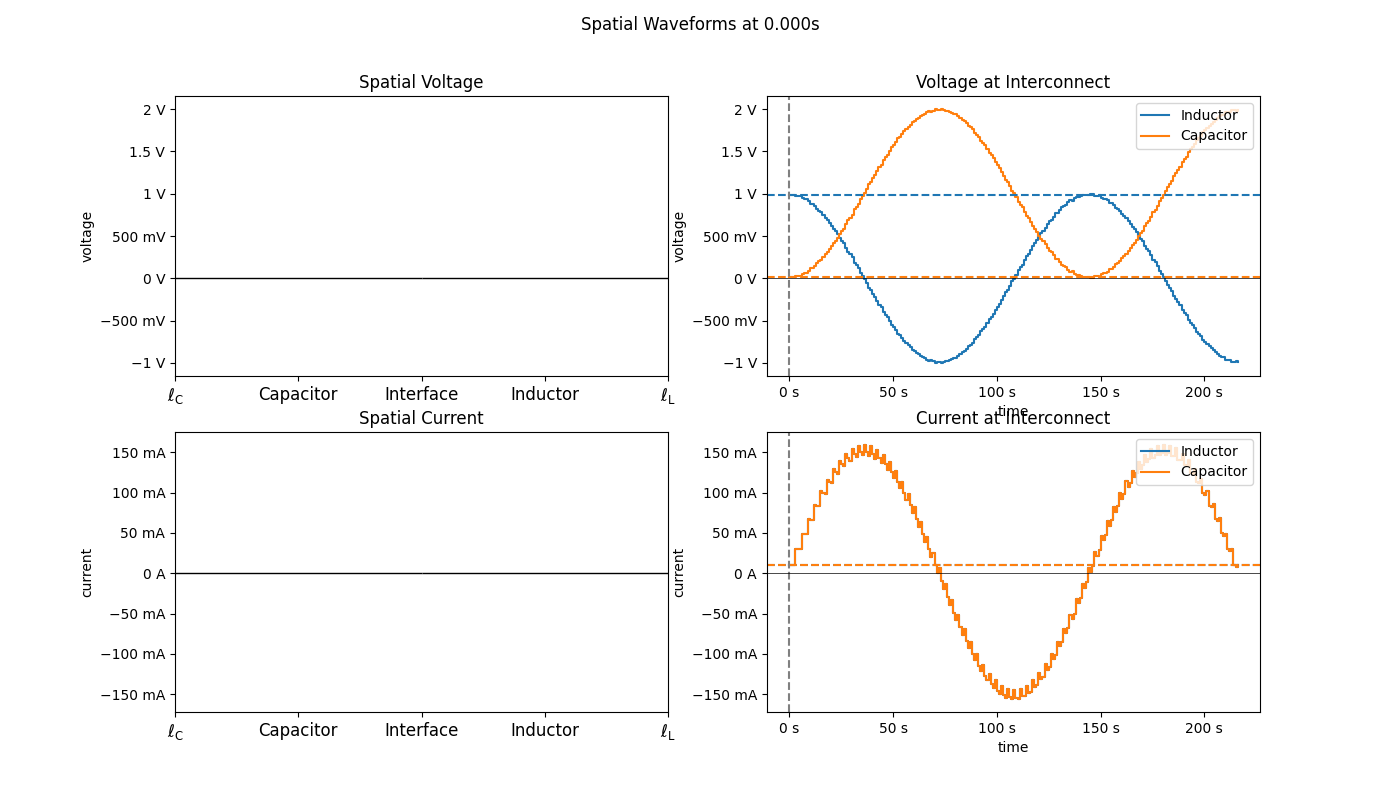

In [3]:
WI.spatial_interconnect_investigator_ui(interface)

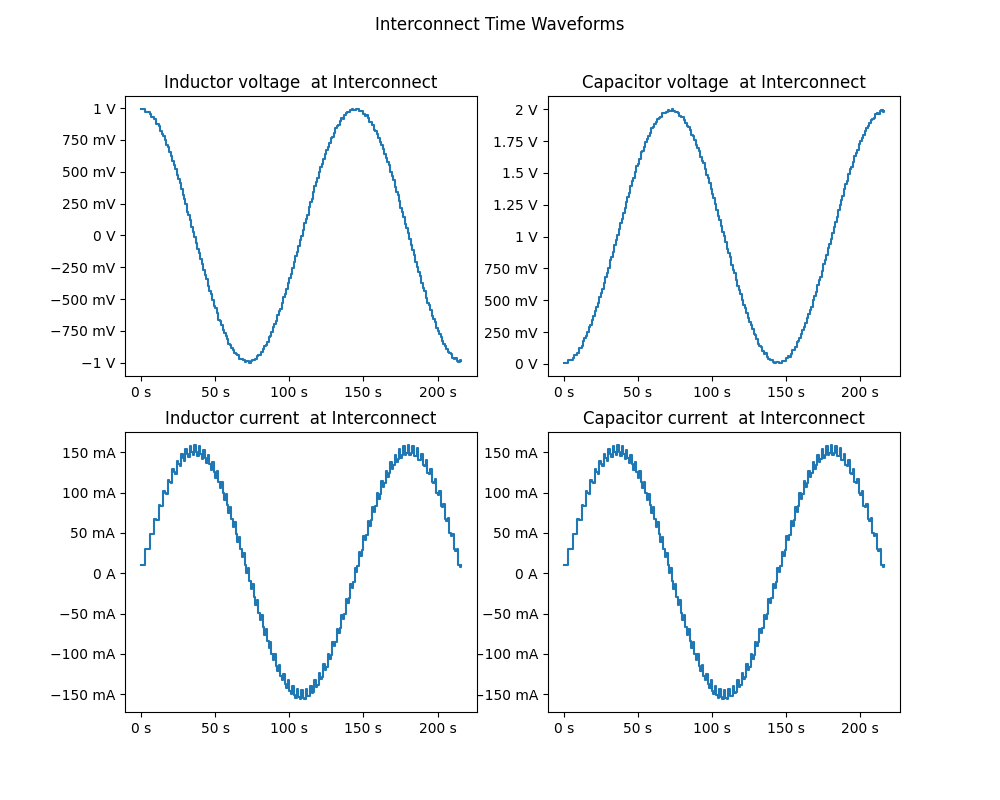

In [4]:
fig_interconnect_all,ax_interconnect_all = WP.make_time_interconnect_all(interface)

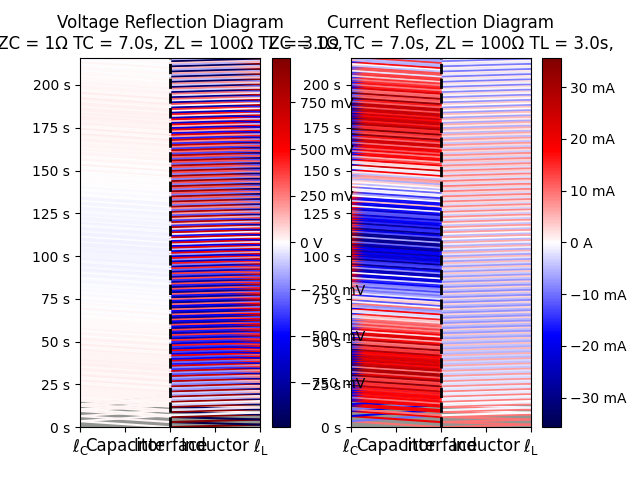

In [5]:
fig_ref, ax_ref = plt.subplots(1,2)

WP.plot_refelction_diagram(interface, ax_ref[0],True)
WP.plot_refelction_diagram(interface, ax_ref[1],False)

interactive(children=(FloatSlider(value=0.0, description='t', layout=Layout(width='auto'), max=215.94879206690…

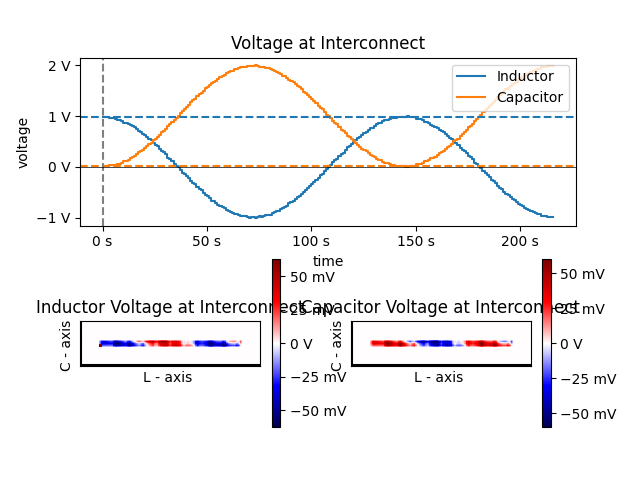

In [6]:
WI.interact_interconnect_time_and_fanout_path(interface,True,10)

interactive(children=(FloatSlider(value=0.0, description='t', layout=Layout(width='auto'), max=215.94879206690…

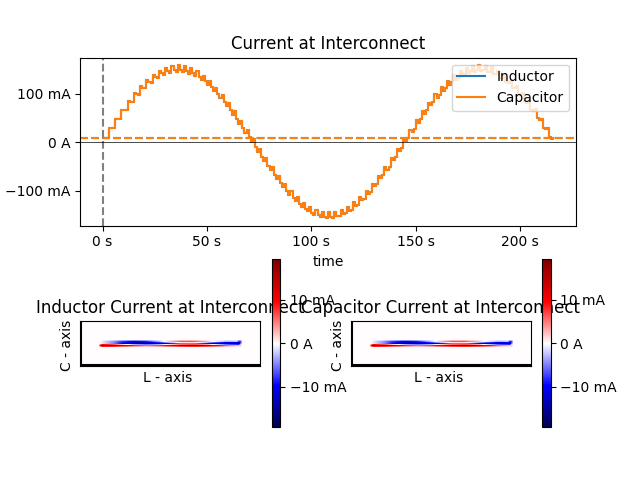

In [7]:
WI.interact_interconnect_time_and_fanout_path(interface,False,10)

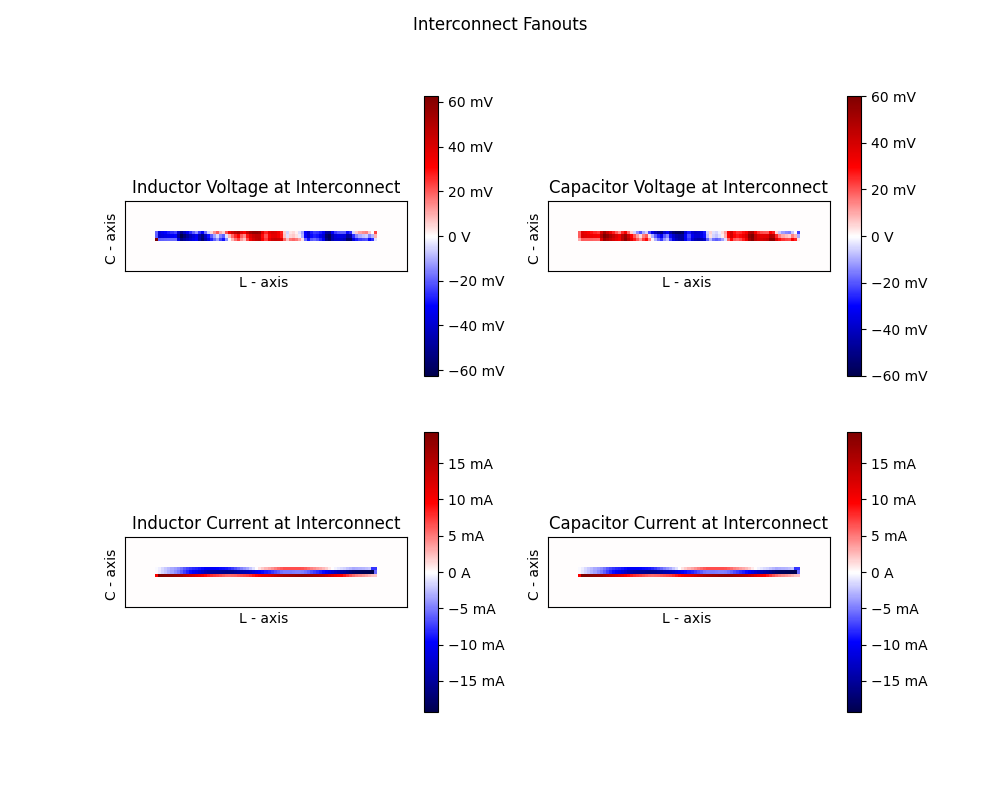

In [8]:
fig_int, ax_int = WP.make_fanout_interconnect_all(interface.data_output_multiplicative,padding=10)
# WP.plot_trace_on_merged_fanout_axis(interface,ax_int['VC'])

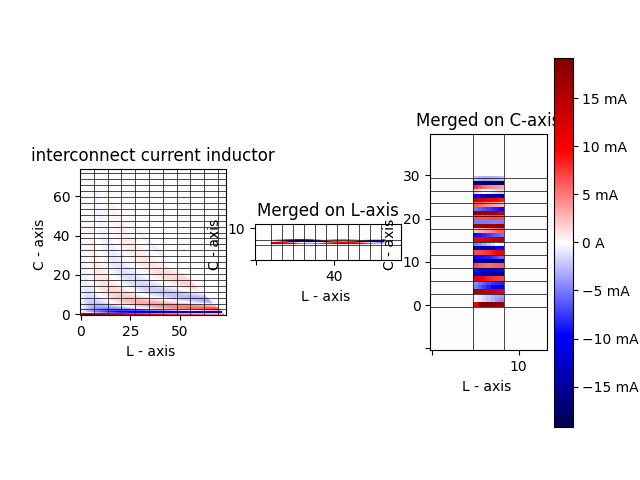

In [9]:
WP.make_commutative_merged_lines(interface,'interconnect','current inductor')

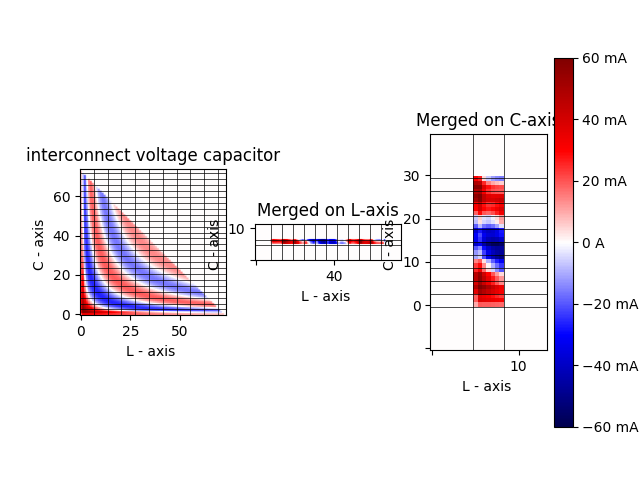

In [10]:
WP.make_commutative_merged_lines(interface,'interconnect','voltage capacitor')

interactive(children=(FloatSlider(value=0.0, description='t', layout=Layout(width='auto'), max=215.94879206690…

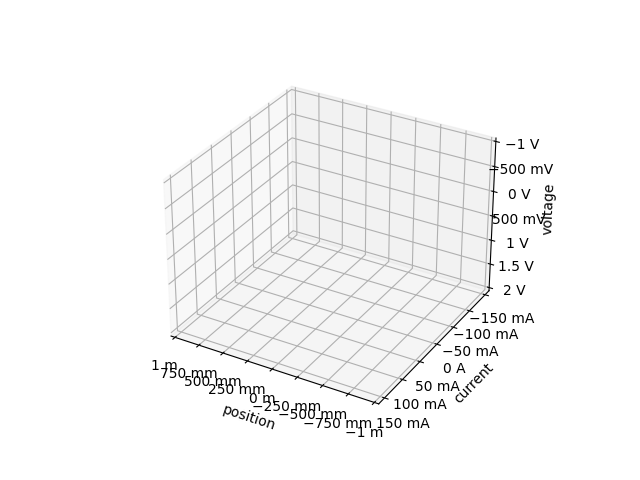

In [11]:
WI.interact_3D_spatial(interface)